In [35]:
import pandas as pd

hotel_data = pd.read_csv('./Hotel Reservations.csv')

In [36]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [37]:
("rows")
print(hotel_data.shape)

(36275, 19)


In [38]:
# find missing values
print(hotel_data.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


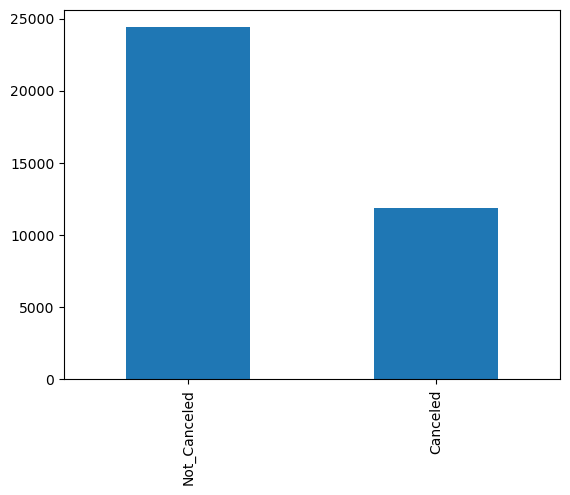

In [39]:
import matplotlib.pyplot as plt

hotel_data['booking_status'].value_counts().plot(kind='bar')

plt.show()

array([[<AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>,
        <AxesSubplot:title={'center':'no_of_week_nights'}>],
       [<AxesSubplot:title={'center':'required_car_parking_space'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_year'}>,
        <AxesSubplot:title={'center':'arrival_month'}>],
       [<AxesSubplot:title={'center':'arrival_date'}>,
        <AxesSubplot:title={'center':'repeated_guest'}>,
        <AxesSubplot:title={'center':'no_of_previous_cancellations'}>,
        <AxesSubplot:title={'center':'no_of_previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'avg_price_per_room'}>,
        <AxesSubplot:title={'center':'no_of_special_requests'}>,
        <AxesSubplot:title={'center':'booking_status'}>, <AxesSubplot:>]],
      dtype=object)

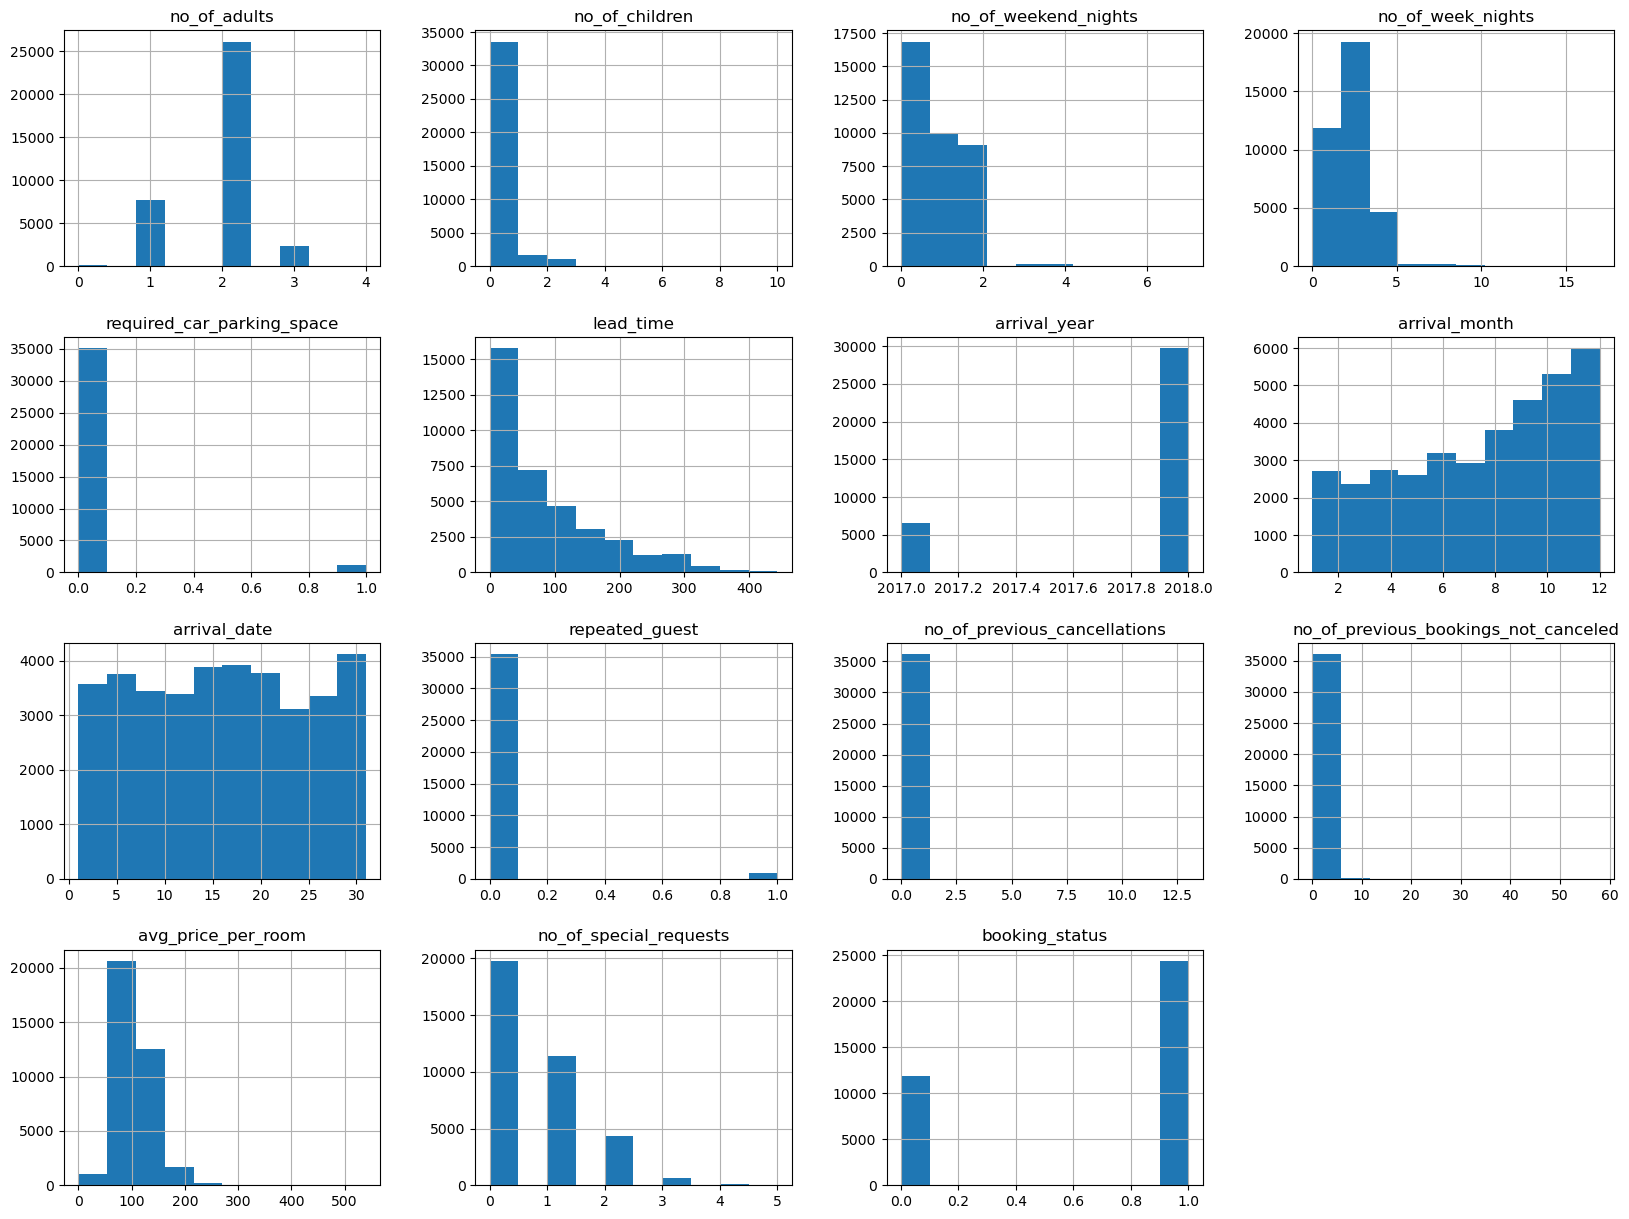

In [40]:
df.hist(bins=10, figsize=(20, 15))

In [41]:
print(hotel_data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [42]:
# transform the booking_status column to numerical
hotel_data['booking_status'] = hotel_data['booking_status'].map({'Canceled': 0, 'Not_Canceled': 1})

corr = hotel_data.corr()
print(corr['booking_status'].sort_values(ascending=False))


booking_status                          1.000000
no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
arrival_date                           -0.010629
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
Name: booking_status, dtype: float64
